In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

In [2]:
# Load Image
image = io.imread(r".\data\Brown_spot\DSC_0100.jpg")
image.shape, image[0,0]

((250, 766, 3), array([255, 255, 255], dtype=uint8))

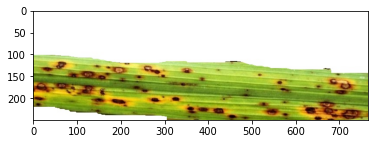

In [3]:
250* 766* 3
plt.imshow(image)

In [4]:
# Gray image
from skimage import color
gray_image = color.rgb2gray(image)
gray_image.shape, gray_image[0, 0] 

((250, 766), 1.0)

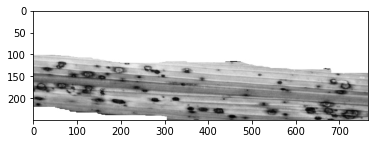

In [5]:
250 * 766
plt.imshow(gray_image, cmap='gray')

In [6]:
# Resizing
from skimage import transform
resized_image = transform.resize(gray_image, (28,28))
resized_image.shape

(28, 28)

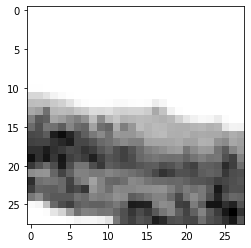

In [7]:
plt.imshow(resized_image, cmap='gray')

In [8]:
resized_image.ravel().shape

(784,)

In [9]:
# Pipeline For Image to feature Vector
import os
labels = ['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']
images_Vector = []
for d in os.listdir('data'):
    for image in os.listdir(f'data\\{d}'):
        #Loading Image
        img = io.imread(f'data\\{d}\\{image}')
        # To Gray
        gray_img = color.rgb2gray(img)
        #Resizing
        resized_img = transform.resize(gray_img, (28,28))
        image_vector = resized_img.ravel()
        # print(image_vector.shape, labels.index(d))
        images_Vector.append([image_vector, labels.index(d)])


In [10]:
# Featur and target
images_vectors = np.array([image[0] for image in images_Vector])
Labels = np.array([image[1] for image in images_Vector])

In [11]:
images_vectors[0], Labels[0]

(array([0.84756358, 0.84695827, 0.84778307, 0.84747483, 0.84845727,
        0.84853557, 0.84759942, 0.84715591, 0.84602921, 0.84281954,
        0.84043743, 0.83693474, 0.83426136, 0.83453593, 0.83653431,
        0.8393286 , 0.84314035, 0.84658494, 0.8487044 , 0.84903303,
        0.84936254, 0.85079169, 0.85255546, 0.85344008, 0.85431414,
        0.85347557, 0.853184  , 0.85169211, 0.84732534, 0.84754407,
        0.84716696, 0.84746012, 0.84831528, 0.84823093, 0.84922814,
        0.84779508, 0.84611033, 0.84263306, 0.84038866, 0.83775926,
        0.83453809, 0.83455973, 0.83618081, 0.83924932, 0.84287873,
        0.84572834, 0.84838912, 0.84940008, 0.85001366, 0.85072419,
        0.85150005, 0.85283159, 0.85339139, 0.8542872 , 0.85343253,
        0.85264997, 0.84846438, 0.84868883, 0.84739951, 0.84750762,
        0.84842536, 0.84855828, 0.84797428, 0.84733046, 0.84620855,
        0.84291974, 0.84064178, 0.83730343, 0.83379518, 0.83352123,
        0.8360914 , 0.83901746, 0.84265107, 0.84

In [12]:
# Dividing Data into Training and Testing set
from sklearn.model_selection import train_test_split
np.random.seed(42)
train_images, test_images, train_labels, test_labels = train_test_split(
    images_vectors, Labels, test_size=0.25
)

In [13]:
train_images.shape, train_labels.shape

((90, 784), (90,))

In [14]:
# Modeling
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(train_images, train_labels.ravel())

LogisticRegression(max_iter=1000)

In [15]:
# Prediction/Validation
ypred = model.predict(test_images)
ypred[0], test_labels[0]

(1, 1)

In [16]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(ypred, test_labels)

array([[8, 4, 1],
       [1, 6, 2],
       [1, 2, 5]], dtype=int64)

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


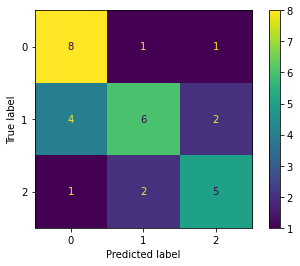

In [17]:
plot_confusion_matrix(model, test_images, test_labels.ravel())

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred, test_labels)

0.6333333333333333